In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Python `get_k_a()`

Text(0.5, 0, 'Gases in RCSLW model')

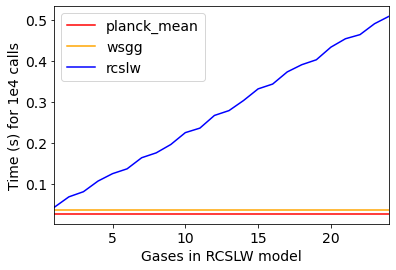

In [7]:
# Total time for 1e4 calls

pm = 0.026886940002441406
# 10000 2.6886940002441408e-06
wsgg = 0.03744220733642578
# 10000 3.744220733642578e-06
rcslw =  0.10749363899230957
# 10000 1.0749363899230957e-05
rcslw_many = [0.04324483871459961, 0.06731843948364258, 0.08123612403869629, 0.10964369773864746, 0.13147997856140137, 0.13945913314819336, 0.16490674018859863, 0.17703485488891602, 0.19556093215942383, 0.22692418098449707, 0.23563766479492188, 0.26952338218688965, 0.2894458770751953, 0.30216264724731445, 0.33269596099853516, 0.3458139896392822, 0.3711433410644531, 0.3900289535522461, 0.39936184883117676, 0.43172311782836914, 0.44626450538635254, 0.47539782524108887, 0.4906337261199951]

# Rerun, don't remember exactly why

pm = 0.02743053436279297
# 10000 2.743053436279297e-06
wsgg = 0.037685394287109375
# 10000 3.7685394287109375e-06
rcslw = 0.10707283020019531
# 10000 1.070728302001953e-05
rcslw_many = [0.0436551570892334, 0.0689389705657959, 0.08141922950744629, 0.10726666450500488, 0.12534523010253906, 0.13705825805664062, 0.16403603553771973, 0.17589950561523438, 0.1961688995361328, 0.2250838279724121, 0.2360363006591797, 0.2668912410736084, 0.27864980697631836, 0.30318236351013184, 0.33145713806152344, 0.3432013988494873, 0.37269163131713867, 0.390261173248291, 0.40221405029296875, 0.4329190254211426, 0.45334339141845703, 0.4633603096008301, 0.4899413585662842, 0.508059024810791]


plt.axhline(pm, color="red", label="planck_mean")
plt.axhline(wsgg, color="orange", label="wsgg")
plt.plot(np.arange(1,1+len(rcslw_many)), rcslw_many, color="blue", label="rcslw")

# plt.ylim(, .5)
plt.xlim(1, 24)
# plt.yscale("log")
plt.legend()
plt.ylabel("Time (s) for 1e4 calls")
plt.xlabel("Gases in RCSLW model")

24


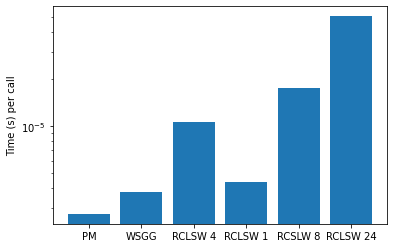

In [58]:
print(len(rcslw_many))
rcslw_few = [rcslw_many[3], rcslw_many[0], rcslw_many[7], rcslw_many[23]]

y = np.array([pm, wsgg, rcslw_few[0], rcslw_few[1], rcslw_few[2], rcslw_few[3]])
y /= 1e4

plt.bar(range(len(y)), y)
labels = ["PM", "WSGG", "RCLSW 4", "RCLSW 1", "RCSLW 8", "RCLSW 24"]
plt.xticks(range(len(y)), labels=labels)
plt.ylabel("Time (s) per call")
plt.yscale("log")

### C++ `get_k_a()`

Text(0, 0.5, 'Time (s) per call of get_k_a')

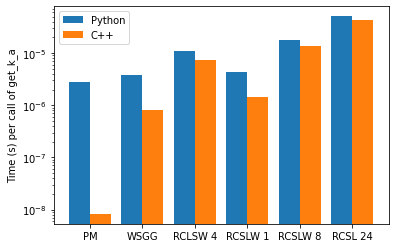

In [70]:
# Average time per call for 1e6 calls
PM = 8.26e-09
WSGG = 7.95407e-07
RCSLW = 7.26426e-06
RC1 = 1.43262e-06
RC8 = 1.34557e-05
RC24 = 4.2999e-05

yC = np.array([PM, WSGG, RCSLW, RC1, RC8, RC24])

xC = np.arange(6)
labelsC = ["PM", "WSGG", "RCLSW 4", "RCSLW 1", "RCSLW 8", "RCSL 24"]
plt.bar(xC-.4, y, align="edge", width=.4, label="Python")
plt.bar(xC, yC, align="edge", width=.4, label="C++")
plt.legend()
plt.xticks(xC, labelsC)
plt.yscale("log")
plt.ylabel("Time (s) per call of get_k_a")


In [54]:
print(y)
print(yC)

[2.74305344e-06 3.76853943e-06 1.07266665e-05 4.36551571e-06
 1.75899506e-05 5.08059025e-05]
[8.26000e-09 7.95407e-07 7.26426e-06 1.43262e-06 1.34557e-05 4.29990e-05]


### Example S3, Jupyter notebook
Done with %timeit in the Jupyter notebook.
(That notebook, with time calls, is still saved as is on Maelstrom in `ugrad/codes/radlib/`.)
I now believe that this timing included imports, construction, etc.

([<matplotlib.axis.XTick at 0x2b75b632588>,
 [Text(0, 0, 'PM'),
  Text(1, 0, 'WSGG'),
  Text(2, 0, 'RCLSW 4'),
  Text(3, 0, 'RCSLW 1'),
  Text(4, 0, 'RCSLW 8'),
  Text(5, 0, 'RCSL 24')])

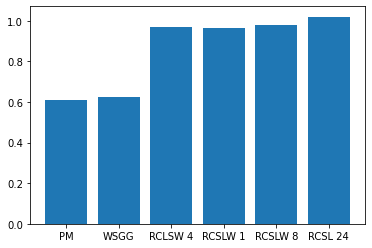

In [59]:
S3_times = [.612, .625, .967, .962, .980, 1.02]
plt.bar(xC, S3_times)
plt.xticks(xC, labelsC)

### Ex. S3, `parallel_plates`, C++
Averaged across 7 calls for each type. The timed call is `parallel_plates` in `ex_S3.cc`

No handles with labels found to put in legend.


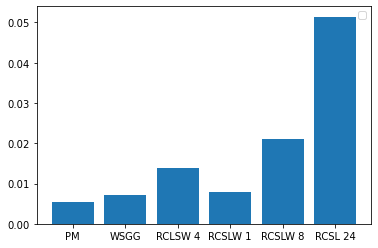

In [66]:
s3_pm    = 0.00549386
s3_wsgg  = 0.00725529
s3_rcslw = 0.0138881
s3_rc1   = 0.00793271
s3_rc8   = 0.0210027
s3_rc24  = 0.0514253
yC_s3 = np.array([s3_pm, s3_wsgg, s3_rcslw, s3_rc1, s3_rc8, s3_rc24])
# plt.bar(xC-.4, S3_times, align="edge", width=.4, label="Python")
# plt.bar(xC, yC_s3, align="edge", width=.4, label="C++")
plt.bar(xC, yC_s3)
plt.xticks(xC, labelsC)

### Ex. S3, `parallel_planes`, Python
Average over 20 calls of `parallel_planes` , as found in `ex_S3.py` .

No handles with labels found to put in legend.


Text(0, 0.5, 'Time (s) per call of parallel_planes')

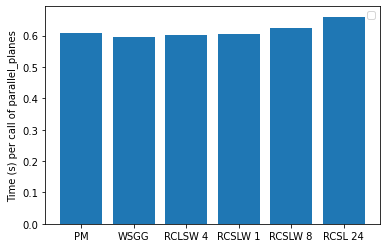

In [78]:
yP_s3 = np.array([.6090, .5969, .6011, .6038, .6244, .6601])

plt.bar(xC, yP_s3)
# plt.bar(xC-.4, yP_s3, align="edge", width=.4, label="Python, parallel_planes")
# plt.bar(xC, yC_s3, align="edge", width=.4, label="C++")
# plt.bar(xC, S3_times, align="edge", color="green", width=.4, label="Jupyter, notebook %timeit")
plt.legend()
plt.xticks(xC, labelsC)
# plt.yscale("log")
plt.ylabel("Time (s) per call of parallel_planes")